# Shap

this is a practice notebook for the Shap library and Explaiable AI

### Imports

In [1]:
import pandas as pd                 #pip install pandas
import numpy as np

import matplotlib.pyplot as plt     #pip install matplotlib
import seaborn as sns               #pip install seaborn

import xgboost as xgb               #pip install xgboost

import shap                         #pip install shap
shap.initjs()                       #initializes the visialization module 

c:\Users\iftek\anaconda3\envs\Diffusion\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data

In [2]:
# importing dataset
data = pd.read_csv("abalone.csv", 
                   names=["Sex","Length","Diameter",
                          "Height","Whole weight","Shucked weight",
                          "Viscera weight","Shell weight","Rings"])

print(len(data))
data.head()

4177


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Exploring the data

Text(0.5, 0, 'whole weight')

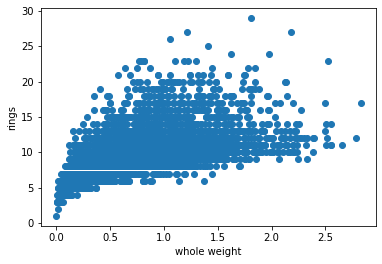

In [3]:
#Weight
plt.scatter(data['Whole weight'],data['Rings'])
plt.ylabel('rings', size=10)
plt.xlabel('whole weight', size=10)

Text(0.5, 0, 'sex')

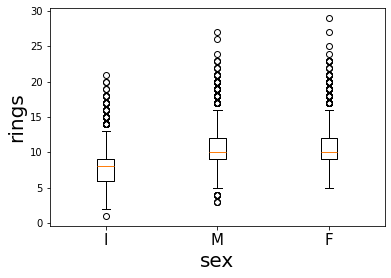

In [4]:
#sex
plt.boxplot(data[data.Sex=='I']['Rings'],positions=[1])
plt.boxplot(data[data.Sex=='M']['Rings'],positions=[2])
plt.boxplot(data[data.Sex=='F']['Rings'],positions=[3])

plt.xticks(ticks=[1,2,3], labels=['I','M','F'],size=15)
plt.ylabel('rings', size=20)
plt.xlabel('sex', size=20)

<Axes: >

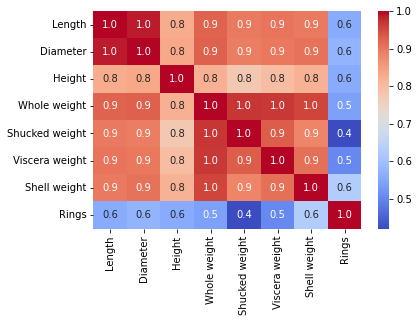

In [5]:
#correlation 
cont = ["Length","Diameter","Height",
        "Whole weight","Shucked weight",
        "Viscera weight","Shell weight",
        "Rings"]
corr_matrix = pd.DataFrame(data[cont],columns=cont).corr()

sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True,
            fmt='.1f')

Chosen data columns

In [9]:
y = data['Rings']
x = data[["Sex","Length",
        "Height","Shucked weight",
        "Viscera weight","Shell weight"]]

Data preparation

In [12]:
# As Sex is a categorical variable we are going to create dummy variable to express them
x['Sex.M'] = [1 if s == 'M' else 0 for s in x['Sex']]
x['Sex.F'] = [1 if s == 'F' else 0 for s in x['Sex']]
x['Sex.I'] = [1 if s == 'I' else 0 for s in x['Sex']]
x = x.drop('Sex', axis=1)

x.head

<bound method NDFrame.head of       Length  Height  Shucked weight  Viscera weight  Shell weight  Sex.M  \
0      0.455   0.095          0.2245          0.1010        0.1500      1   
1      0.350   0.090          0.0995          0.0485        0.0700      1   
2      0.530   0.135          0.2565          0.1415        0.2100      0   
3      0.440   0.125          0.2155          0.1140        0.1550      1   
4      0.330   0.080          0.0895          0.0395        0.0550      0   
...      ...     ...             ...             ...           ...    ...   
4172   0.565   0.165          0.3700          0.2390        0.2490      0   
4173   0.590   0.135          0.4390          0.2145        0.2605      1   
4174   0.600   0.205          0.5255          0.2875        0.3080      1   
4175   0.625   0.150          0.5310          0.2610        0.2960      0   
4176   0.710   0.195          0.9455          0.3765        0.4950      1   

      Sex.F  Sex.I  
0         0      0  
1  

## Modelling

In [13]:
# Train
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Text(0.5, 0, 'Actual')

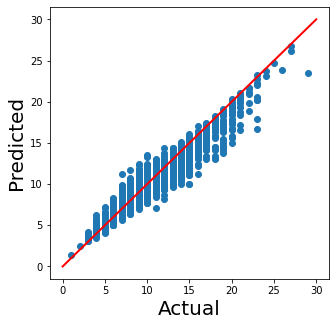

In [14]:
#get predictions
y_pred = model.predict(x)

#Model evaluation
plt.figure(figsize=(5,5))

plt.scatter(y,y_pred)
plt.plot([0,30],
         [0,30],
         color='r',
         linestyle='-',
         linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)